# Using Python to find clusters

Now, let's repeat the data processing and analysis in Python. Remember to set your working directory appropriately and include the pbmcs.txt file before you enter the following code.

```R
A_table = read.table("pbmcs.txt", header=TRUE, row.names =1, sep = "", dec = ".")
A_matrix = as.matrix(A_table)
A_log = log(A_matrix+1)

A_pc = prcomp(A_log, retx = T)

pr_var = (A_pc$sdev)^2
percent_varex = pr_var/sum(pr_var)*100

plot(A_pc$x[,1], A_pc$x[,2], pch="*")

library("Rtsne")
A_tsne <- Rtsne(A_pc$x[,1:50], pca=F)

cluster_labels = kmeans(A_pc$x[,1:50], 6, iter.max = 10000, nstart = 1)
plot(A_tsne$Y, col=cluster_labels$cluster, pch="*")
```

## Loading and Transforming Data

First, we load and transform our data.

In [1]:
import pandas as pd
import numpy as np

file='pbmcs.txt'
A_table = pd.read_csv(file, sep='\t', header=0, index_col=0) 
A_log=np.log(A_table+1)

In [2]:
A_table.head()

,TNFRSF4,CPSF3L,ATAD3C,C1orf86,RER1,TNFRSF25,TNFRSF9,CTNNBIP1,SRM,UBIAD1,...,DSCR3,BRWD1,BACE2,SIK1,C21orf33,ICOSLG,SUMO3,SLC19A1,S100B,PRMT2
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.000000,8.267879,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,2.039568,0.000000,0.0,0.000000,0.0,0.0,...,0.0,2.039568,0.0,0.0,2.039568,0.0,0.000000,0.0,0.0,0.00000
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,3.177630,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,3.17763
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,3.789314,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,3.789314,0.0,3.789314,0.0,0.0,0.00000
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,10.204082,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000


In the R code, you have to transform the A_table data structure into A_matrix before log-transforming the data, whereas in Python, you directly log transform the data contained in A_table. This is because A_table in Python can undergo matrix operations.

In Python and R, A_table both contain gene names as headers.

In Python, A_table is transformed using the command np.log( ), which is the natural log, not logarithm base 10, similar to the R code.

## Running a PCA

Next, we run a PCA on the transformed data.

In [3]:
from sklearn.decomposition import PCA

PCA = PCA(n_components=50)
PCA.fit(A_log)
A_pca = PCA.transform(A_log)

Recall that in downstream analysis, you use the first 50 principal components for k-means clustering. Thus, you specify n_components=50 to obtain 50 principal components.
The default setting for the PCA function is n_components = 2; in other words, running PCA = PCA() and PCA = PCA(n_components=2) are equivalent to each other and both output only two principal components. Thus the statement that no principal components are output into A_pca when n_components is not specified is false. While the statement that only two principal components are output into A_pca when n_components=2 is true, it does not fully explain why you need 50 principal components.

Finally, the 50 principal components are used to generate clusters by k-means, and are not required for visualizing the output of PCA (creating the PCA figure).

## Visualizing with PCA

Now, we visualize the output of the PCA. Note that following code is missing the x- and y- inputs for the scatter plot, indicated by ???.

See also [Python documentation on the PCA function](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [6]:
A_pca[:2]

array([[-4.43402601e+00,  2.50231546e-01, -1.49886122e+00,
        -3.17573718e-03,  9.15125908e-01, -6.78506447e-01,
        -1.09003530e+00, -9.32840872e-01,  3.12317429e+00,
         1.11125287e+00, -1.11913522e+00,  7.23350944e-01,
         9.01473677e-01, -1.13228744e+00,  1.08528227e+00,
        -2.13111591e-01, -1.40891925e+00, -1.69283668e+00,
         1.77915175e+00, -1.10450391e+00,  4.27888171e-01,
        -1.85394013e-01,  1.97406547e+00, -3.48034717e-01,
         1.54343756e-01, -1.29926892e+00, -7.51652311e-01,
        -6.33765878e-01, -8.33774049e-01, -1.88575455e-01,
        -7.50478449e-01, -9.17053157e-02,  2.18518633e-01,
         1.44856505e+00,  8.86278695e-01, -1.16736716e+00,
         1.37981758e+00,  1.29975269e+00,  1.00075051e-01,
        -6.81588402e-01, -9.16963070e-01, -4.25593614e-01,
        -3.46755696e-01,  7.57965285e-01,  2.24084421e+00,
         5.08560406e-01, -1.93254030e+00, -8.36197870e-01,
         8.72141500e-01, -6.60628640e-01],
       [-7.58

Text(0, 0.5, 'PC2')

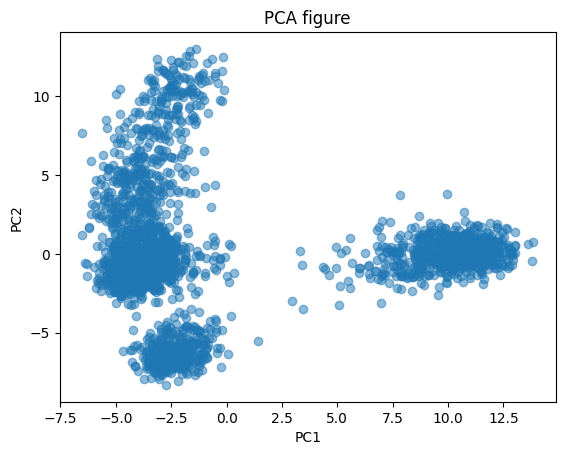

In [7]:
import matplotlib.pyplot as plt

plt.scatter(A_pca[:,0], A_pca[:,1], alpha=0.5)
plt.title('PCA figure')
plt.xlabel('PC1')
plt.ylabel('PC2') 

Recall that Python indexing starts from 0, and A_pca is organized so that rows represent cells, and columns represents principal components. The 1st principal component is represented by the 1st column and all the rows of A_pca, and is specified by A_pca[:,0]. The 2nd principal component is represented by the 2nd column and all the rows of A_pca, and is specified by A_pca[:,1].

A_pca[0,:] represents the 1st row and all the columns of A_pca, and A_pca[1,:] represents the 2nd row and all the columns of A_pca. This gives you all 50 principal components for only the 1st and 2nd cell!

A_pca[:,1] and A_pca[:,2] correspond to the 2nd and 3rd principal components for all cells.

A_pca[1,:] and A_pca[2,:] correspond to all 50 principal components for just the 2nd and 3rd cell.

## Visualizing with t-SNE

Next, we install, run, and visualize the output of t-SNE (this may take some time to run). Note that this code is also missing the x- and y-inputs for the scatter plot, indicated by ???.

See also [Python documentation on the TSNE function](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

In [9]:
from sklearn.manifold import TSNE

TSNE = TSNE(random_state=1, early_exaggeration=4, learning_rate=500.0)
A_tsne = TSNE.fit_transform(A_pca)

c:\Users\Sébastien\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [10]:
A_tsne[:5]

array([[ -8.014806 ,  17.49218  ],
       [ -3.902082 , -39.0647   ],
       [ -3.903632 ,  -0.9239499],
       [ 41.78487  ,  -5.3822575],
       [ 12.853751 ,  35.29778  ]], dtype=float32)

Text(0, 0.5, 't-SNE2')

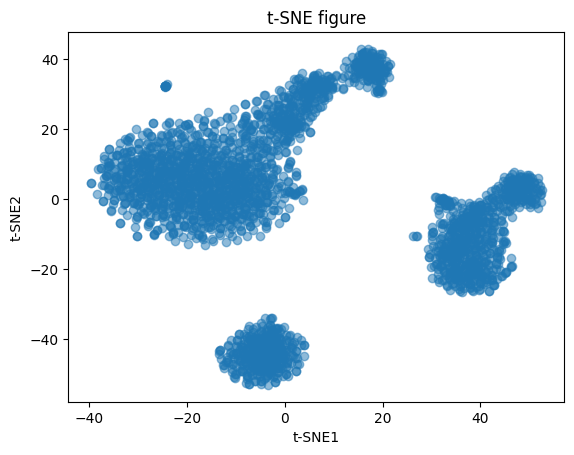

In [11]:
plt.scatter(A_tsne[:,0], A_tsne[:,1], alpha=0.5)
plt.title('t-SNE figure')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2') 

## Using k-Means to Cluster Cells

Finally, let's run a k-means clustering method to group the observations into six clusters based on their gene expression profiles.

First, define the output of the clustering method as the cluster assignment per cell generated from the 50 principal components.



See also [Python documentation on the KMenas function](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, max_iter=10000)
kmeans.fit(A_pca)
cluster_labels = kmeans.predict(A_pca)

Now overlay the cluster assignments onto the t-SNE scatter plot you generated previously. Note that the missing portion of code in the line plt.scatter(???, ???, c=cluster_labels, cmap='viridis', alpha=0.5) should match the correct answer for the problem "Visualizing Output of the t-SNE".

Text(0, 0.5, 't-SNE2')

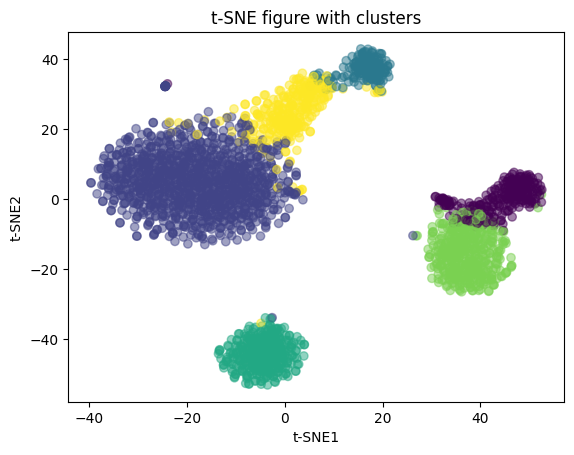

In [13]:
plt.scatter(A_tsne[:,0], A_tsne[:,1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE figure with clusters')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

## Using MATLAB to find clusters

The MATLAB code for loading the file pbmcs.txt is similar to R and Python. For example, you can load the data into a table variable and then extract out the matrix.

```
%----------------------------------
% Loading and transforming the data
%----------------------------------
%load file
load('A_table.mat')

%take the natural log (1+normalized count) to reduce skewness
A_log=log(A_table{:,:} + 1);

%----------------
% Running the PCA
%----------------
%perform PCA on normalized z-scores
[loadings, pc_score, variances] = pca(A_log); %pc_score = (A_log - mean(A_log)) * loadings;

%store the first 50 principal components for later analysis
PCs50 = pc_score(:,1:50);

%store the first 2 principal components for visualization
PC1 = pc_score(:,1);
PC2 = pc_score(:,2);

%create a scatterplot of PC1 vs PC2
scatter(PC1,PC2,'.');
%create x and y axis labels
ylabel("PC1");
xlabel("PC2");

%------------------------------------
% Dimensionality Reduction with t-SNE
%------------------------------------
%load first 50 PCs
%load('PCs50.mat');

%perform t-SNE to reduce dimensionality of z-scores
A_tsne=tsne(PCs50);
tSNE1 = A_tsne(:,1) ;
tSNE2 = A_tsne(:,2) ;

%create a scatterplot with t-SNE dimensions
scatter(tSNE1, tSNE2,'.');
%create x and y axis labels
ylabel("t-SNE1");
xlabel("t-SNE2");

%-----------------------------------
% Edited Applying k-Means Clustering
%-----------------------------------
%load file
%load('kmeans_var.mat')

%number of desired clusters
num_clusters= 6;

%cluster analysis on the first 50 principal components
%returns for each cell a number corresponding to the cluster to which the cell belongs
cluster_labels = kmeans(PCs50,num_clusters,'MaxIter',10000);

%overlay the cluster labels onto the t-SNE dimensionality reduction
scatter(tSNE1,tSNE2,10,cluster_labels,'.');
```

### Determining Expression Values of One Gene in Cluster 1

Determining Expression Values of One Gene in Cluster 1

```
%load relevant files
load('cluster_labels.mat');
load('A_table.mat');
load('A_log.mat');

%generate logical arrays that indicate cells that belong in cluster 1 and those that do not belong in cluster 1
cluster = 1;
cluster_cells = (cluster_labels==cluster);
noncluster_cells = (cluster_labels~=cluster);

%find the column index of the gene LTB in A_table
LTB_idx = find(string(A_table.Properties.VariableNames) == "LTB");
%get the expression values of the gene LTB from cells in cluster 1 and those not in cluster 1 
LTB_expr_cluster= A_log(cluster_cells,LTB_idx);
LTB_expr_noncluster= A_log(noncluster_cells,LTB_idx);

```

The dimensions of the logical array cluster_cells should consist of one column and many rows, with each row corresponding to a cell. A value of O means the cell does not belong in cluster 1, a value of 1 in this array means the cell belongs in cluster 1.


Both cluster_cells and noncluster_cells are logical arrays that contain values of 0 or 1 to indicate whether cells belong or do not belong to cluster 1. You should be able to determine how many cells belong in cluster 1 by summing the values of 1 contained in the array cluster_cells, using the command `sum()`. Similarly, you should be able to determine how many cells do NOT belong in cluster 1 by using the `sum()` command on noncluster_cells.

### LTB Expression Inside and Outside Cluster 1

In the next step, you will determine expression values for one gene (LTB) inside and outside of cluster 1, using t-test

```
%load relevant files
%load('LTB_in_out_cluster1.mat');

[~,p] = ttest2(LTB_expr_cluster, LTB_expr_noncluster,'Vartype','unequal')

%define the threshold for the t-test 
threshold=significance_level/(num_genes*num_clusters) % adjusted threshold level accounting for multiple tests

%determine the average expression levels of LTB in cluster 1 cells and in cells not in cluster 1
LTB_cluster1= mean(LTB_expr_cluster)
LTB_noncluster1 = mean(LTB_expr_noncluster)
```

The p-value (p = 2.7420e-69) is less than the threshold value (thres = 9.0678e-07), and therefore is significant. The average LTB expression in cells inside cluster 1 (0.8742) is significantly different and is lower than the average LTB expression in cells outside cluster 1 (2.1454).

### Differentially highly expressed genes in cluster 1

In next step you will write a for loop that stores the gene names, their indices, and p-values for genes that are expressed significantly higher in cluster 1 cells compared to cells not in cluster 1.

```
%load file
%load('diff_genes_clust1.mat')

%initialize data structures to store results for each gene 
%for cluster 1
cluster1_genes=[];
cluster1_pvalues_per_gene=[];
gene_counter=0;
    
%for every gene...
for gene = 1:num_genes %total number of genes
    %get the gene expression values for cells in cluster 1
    expr_cluster=A_log(cluster_cells, gene);
    %get the gene expression values for cells NOT in cluster 1
    expr_noncluster=A_log(noncluster_cells, gene);
    
    %check for differential gene expression between cells in and out
    %of cluster 1  
    [~,p] = ttest2(expr_cluster,expr_noncluster,'Vartype','unequal');    
    
    %store results only if...
    
    %1. p-value from t-test is significant...
    if p < threshold
          %AND 2. mean gene expression is higher in cells in cluster 1 vs noncluster 1
          if mean(expr_cluster) > mean(expr_noncluster)
              %count the gene
              gene_counter=gene_counter+1;
              %remember the gene by its index number
              cluster1_genes(gene_counter)=gene;
              %remember p-value for the gene
              cluster1_pvalues_per_gene(gene_counter)=p;
          end 
    end
end
```

### Differentially highly expressed genes across clusters

```
%load file
load('diff_genes_across.mat')

%write a for loop that for each cluster...
for cluster = 1:num_clusters
    %generate a logical array indicating the cells that belong in the cluster 
    cluster_cells = (cluster_labels==cluster);
    %generate a logical array indicating the cells that do NOT belong in the cluster 
    noncluster_cells = (cluster_labels~=cluster);
    %initialize/reset data structures to store results for each gene 
    %for every cluster for each iteration of the for loop
    cluster_genes=[];
    cluster_pvalues_per_gene=[];
    gene_counter=0;
    
    %for every gene...
    for gene = 1:num_genes
        %get the gene expression values for cells in the cluster 
        expr_cluster=A_log(cluster_cells, gene);
        
        %get the gene expression values for cells NOT in the cluster
        expr_noncluster=A_log(noncluster_cells, gene);
    
        %check for differential gene expression between cells in and out of the cluster 
        [~,p] = ttest2(expr_cluster,expr_noncluster,'Vartype','unequal');    
    
        %store results only if...
        %1. p-value from t-test is significant...
        if p < threshold
            %AND 2. mean gene expression is higher in cells in the cluster vs not in the cluster 
            if mean(expr_cluster) > mean(expr_noncluster)
                %count the gene
                gene_counter=gene_counter+1;
                %remember the gene by its index number
                cluster_genes(gene_counter)=gene;
                %remember the p-value for the gene
                cluster_pvalues_per_gene(gene_counter)=p;
            end 
        end
    end
    %store the information for each cluster in a data structure called ge_clusters
    
    %get the number of the cluster 
    ge_clusters(cluster).name = cluster;
    %get the indices of the differentially highly expressed genes for the cluster
    ge_clusters(cluster).genes = cluster_genes;
    %get the p-values of the differentially highly expressed genes for the cluster
    ge_clusters(cluster).pvalues = cluster_pvalues_per_gene;
end
```

The data structure `ge_clusters` stores the name (the number) of each cluster under the header "name", the indices (under the header "genes") and the p-values (under the header "pvalues") of differentially highly expressed genes for each cluster. You can determine the number of differentially highly expressed genes by counting the number of elements stored in either "genes" or "pvalues", using the command `length()`.

There is only one element (the cluster number) stored under "name" for each cluster, and thus it is not useful for determining the number of differentially highly expressed genes.

Running the command `sum()` will output the sum of all values stored under any particular header, and does not provide you with useful information.


Which lines of MATLAB code would successfully create a for loop that would output the number of differentially highly expressed genes for each cluster from ge_clusters?

The correct lines of MATLAB code in order are:

```
for cluster = 1:num_clusters
    length(ge_clusters(cluster).genes)
end
```

`for cluster = num_clusters` outputs the number of differentially highly expressed genes for only cluster 6!

Any line using the command `sum()` or focusing on `ge_clusters(cluster).name` is not useful as previously discussed (refer to the Show Answer explanation in the previous problem).

### Visualizing the top 10 DEG in a cluster

After you have identified the differentially highly expressed genes for every cluster, the next step would be to look at a subset, for example, the top 10 differentially highly expressed genes with the lowest p-values, and visualize their expression levels across all cells.

For example, to identify the top 10 differentially highly expressed genes in cluster 1, you could run the following MATLAB code:

```
cluster = 1
%sort differentially highly expressed genes by p-values in ascending order
[B,I] = sort(ge_clusters(cluster).pvalues);
%get the names of the top 10 genes    
top10_genes=A_table.Properties.VariableNames(ge_clusters(cluster).genes(I(1:10)));
```

Then, you visualize which cells belong to cluster 1 by modifying the t-SNE figure you generated earlier.

```
%create t-SNE figure depicting which cells belong in cluster 1
figure
scatter(A_tsne(:,1),A_tsne(:,2),10,(cluster_labels==cluster), '.');
xlabel('t-SNE1')
ylabel('t-SNE2')
title(strcat('Cluster',{' '},num2str(cluster)))
```

Finally, you visualize the expression levels of each top 10 differentially highly expressed gene in cluster 1 for all cells in the t-SNE figure.

```
%create 2nd figure depicting the expression of the top 10 genes for cluster 1 across all cells
figure
%loop through each gene in the top 10 genes in cluster 1
for pl=1:10
    %create a subplot in position 1-10 (specified by pl) within the figure
    subplot(2,5,pl);
    %specify which gene by index 1-10
    cur_gene=top10_genes(pl);
    %create scatter plot from t-SNE 
    scatter(A_tsne(:,1),A_tsne(:,2),10,log(table2array(A_table(:,top10_genes(pl)))+1));
    %label subplot with the name of the gene
    title(cur_gene);
    sgtitle("Cluster " + num2str(cluster));
end
%get the position of the last subplot in 2nd figure to position the colorbar
hp10 = get(subplot(2,5,10),'Position'); 
%create, position the color bar in the 2nd figure
colorbar('Position', [hp10(1)+hp10(3)+0.05  hp10(2)  0.1  hp10(2)+hp10(3)*5.5], 'AxisLocation','in', "Ticks",[0,1,2,3,4,5,6,7]);
```

The first figure highlights the cells that belong to the example cluster in yellow in the t-SNE figure. Recall that each circle in the t-SNE figure represents an individual cell.

![example cluster](https://courses.edx.org/assets/courseware/v1/1bebbc8ae5c96cad16a1cd0ac505cbdd/asset-v1:MITx+7.QBWx+2T2022+type@asset+block/example_cluster.png)

The second figure consists of 10 subplots of the t-SNE figure depicting the log normalized expression levels for each of the top 10 differentially highly expressed genes from the example cluster.

Again, each circle represents an individual cell. The color of the circle indicates the log normalized expression level of the corresponding top 10 gene for that individual cell.

Yellow to orange (5 - 3.5) indicates high gene expression, green to light blue (3.5 - 2) indicates moderate gene expression, and light to dark blue (2 - 0 ) indicates low gene expression.

![top 10 genes of example cluster](https://courses.edx.org/assets/courseware/v1/579fc980ff01da1556ee4caedeb36947/asset-v1:MITx+7.QBWx+2T2022+type@asset+block/example_cluster_top10.png)

To identify the cells comprising your cluster of interest, you want to identify the subset of the top 10 differentially highly expressed genes that are specifically expressed in cells only within your cluster, and compare those against known marker genes of peripheral mononuclear blood cells.

Top 10 genes expressed in multiple clusters may not be specific enough to help you identify the cells comprising your cluster of interest.

While the gene with the highest expression level specific to your cluster can be helpful, there is no reason why you should only focus on a single gene.

The gene with the highest expression level within multiple clusters may also not be specific enough to help you identify the cells comprising your cluster of interest.

For reference, a chart listing out some of the marker genes that distinguish the different cell types found in peripheral mononuclear blood cells is given:

| cell type |       marker genes        |
|:---------:|:-------------------------:|
| Th cells  |    CD2, CD4, MAL, AQP3    |
| Tc cells  |       CD2, CD8, AQP3      |
| NK cells  |         GNLY, NKG7        |
| monocytes | MS4A7, FCGR3A, CD14, CD16 |
| B cells   |           MS4A1           |
| dendritic |        FCER1A, CST3       |

The top 10 differentially highly expressed genes (mostly) specific to the example cluster are MAL, AQP3, LDLRAP1, and TRABD2A. The cell type Th cells contains the marker genes MAL and AQP3, suggesting the example cluster is comprised of Th cells.